<a href="https://colab.research.google.com/github/Shewitte/Sentiment-Analysis-for-Amharic-Language-using-Twitter-Dataset/blob/main/Copy_of_meme_LSTM_Best_with_plot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install numpy pandas tensorflow keras matplotlib nltk

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import pad_sequences
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout


In [37]:
import pandas as pd # Import the pandas library and alias it as 'pd'

data = pd.read_csv('/content/ameharic meme.csv')

In [38]:
print(data.head())

  Image ID                                               text     label
0  Image_1  ሰላም FB ሳትጠቀም ኮሜንት ታነባለ ፍናን ደብዳቤ ሳታነብ የፍቅር መሆኑን...   neutral
1  Image_2  ከ ፍናን የምትበልጥ ቆንጆ አርቲስት ካሳየኸኝ ኢትዮጵያ የሚለውን የ ሀጫሉ...   neutral
2  Image_3  እቺ ልጅ በርገር ብትበላ ዳናይትን ፈስታ ሰላም ተስፋዬን አርታ ቤቲን ታስ...  negative
3  Image_4  የለበሰው ልብስ እና ጫማ ተበትኖ ድጋሚ ቢሰፋ ሙሉ የኢትዮጵያን ህዝብ አል...   neutral
4  Image_5                       ይሔ ልጅ ግን ሀቂቃን ዛሬ ነው እንዴ የሰማው   neutral


In [40]:
!pip install tensorflow
import numpy as np
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.sequence import pad_sequences # Changed import to use tensorflow.keras
from tensorflow.keras.preprocessing.text import Tokenizer # Changed import to use tensorflow.keras

In [41]:
data['cleaned_text'] = data['text'].astype(str).apply(lambda x: x.lower() if pd.notna(x) else x)

In [42]:
import pandas as pd # Import the pandas library and alias it as 'pd'
from tensorflow.keras.preprocessing.text import Tokenizer # Changed import to use tensorflow.keras
from tensorflow.keras.utils import pad_sequences # Changed import to use tensorflow.keras.utils

data = pd.read_csv('/content/ameharic meme.csv')
data['cleaned_text'] = data['text'].astype(str).apply(lambda x: x.lower() if pd.notna(x) else x)

max_length = 100  # Maximum number of words in a sequence

# 1. Create a Tokenizer instance
tokenizer = Tokenizer(num_words=5000, oov_token='<OOV>') # You can adjust num_words

# 2. Fit the tokenizer on your text data
tokenizer.fit_on_texts(data['cleaned_text'])

# 3. Convert text to sequences of integers
sequences = tokenizer.texts_to_sequences(data['cleaned_text'])

# 4. Call pad_sequences using the created sequences
X = pad_sequences(sequences, maxlen=max_length)

In [43]:
print("Unique labels before encoding:", data['label'].unique())

Unique labels before encoding: ['neutral' 'negative' 'Positive' nan 'negetive' 'Postive']


In [44]:
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(data['label'])

In [45]:
# ipython-input-2-2eb53259242a
from sklearn.preprocessing import LabelEncoder # Importing LabelEncoder here
from sklearn.model_selection import train_test_split # Importing train_test_split



In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [47]:
from sklearn.model_selection import train_test_split

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [49]:
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout


In [50]:
model = Sequential()
model.add(Embedding(input_dim=5000, output_dim=128, input_length=max_length))
model.add(LSTM(64, return_sequences=True))
model.add(Dropout(0.5))
model.add(LSTM(32))
model.add(Dropout(0.5))
model.add(Dense(6, activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [51]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [52]:
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/10
72/72 ━━━━━━━━━━━━━━━━━━━━ 15s 154ms/step - accuracy: 0.3782 - loss: 1.5667 - val_accuracy: 0.4483 - val_loss: 1.1910
Epoch 2/10
72/72 ━━━━━━━━━━━━━━━━━━━━ 18s 117ms/step - accuracy: 0.4561 - loss: 1.2053 - val_accuracy: 0.6200 - val_loss: 0.9122
Epoch 3/10
72/72 ━━━━━━━━━━━━━━━━━━━━ 11s 133ms/step - accuracy: 0.7101 - loss: 0.7791 - val_accuracy: 0.7391 - val_loss: 0.7179
Epoch 4/10
72/72 ━━━━━━━━━━━━━━━━━━━━ 11s 149ms/step - accuracy: 0.8475 - loss: 0.5077 - val_accuracy: 0.7863 - val_loss: 0.6050
Epoch 5/10
72/72 ━━━━━━━━━━━━━━━━━━━━ 18s 117ms/step - accuracy: 0.8640 - loss: 0.4182 - val_accuracy: 0.8021 - val_loss: 0.6506
Epoch 6/10
72/72 ━━━━━━━━━━━━━━━━━━━━ 11s 133ms/step - accuracy: 0.9083 - loss: 0.2651 - val_accuracy: 0.7986 - val_loss: 0.6264
Epoch 7/10
72/72 ━━━━━━━━━━━━━━━━━━━━ 11s 150ms/step - accuracy: 0.9178 - loss: 0.2361 - val_accuracy: 0.8004 - val_loss: 0.7726
Epoch 8/10
72/72 ━━━━━━━━━━━━━━━━━━━━ 11s 149ms/step - accuracy: 0.9343 - loss: 0.2077 - val_accu

In [53]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy * 100:.2f}%')

18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.8034 - loss: 0.8403
Test Accuracy: 78.63%


In [54]:
from sklearn.metrics import classification_report # Import classification_report
from sklearn.preprocessing import LabelEncoder



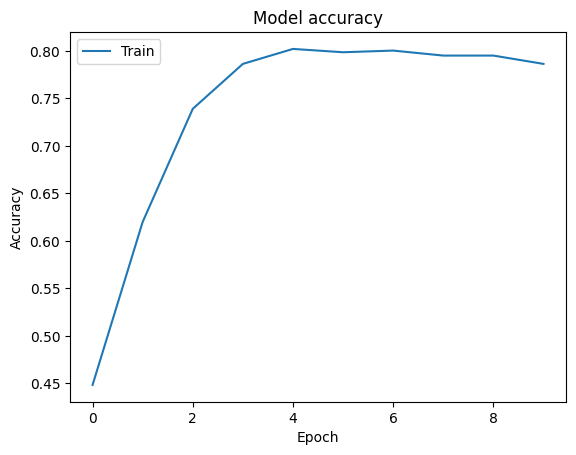

In [55]:
import matplotlib.pyplot as plt
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [57]:
predicted_classes = model.predict(X_test)  # Replace X_test_pad with X_test
predicted_labels = np.argmax(predicted_classes, axis=1)

18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step


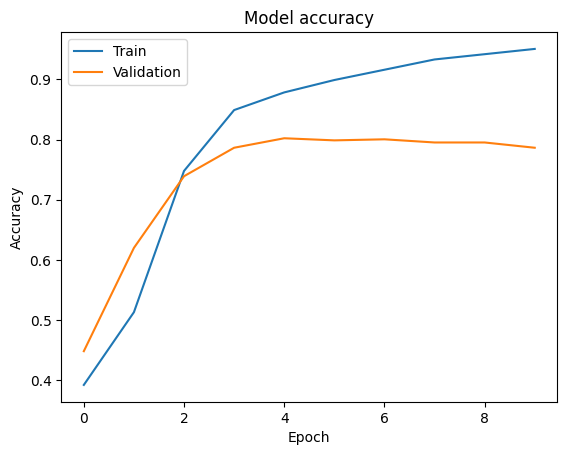

In [59]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

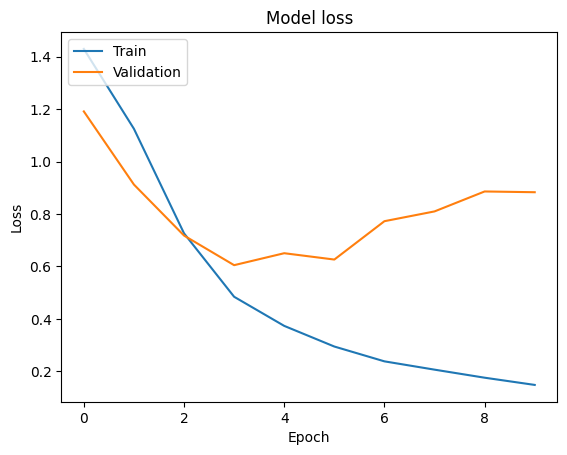

In [60]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()